In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [155]:
!pip install folium


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\noure\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [156]:
df_customers=pd.read_csv("olist_customers_dataset.csv")
df_geolocation=pd.read_csv("olist_geolocation_dataset.csv")
df_order_items=pd.read_csv("olist_order_items_dataset.csv")
df_order_pays=pd.read_csv("olist_order_payments_dataset.csv")
df_order_reviews=pd.read_csv("olist_order_reviews_dataset.csv")
df_orders=pd.read_csv("olist_orders_dataset.csv")
df_products=pd.read_csv("olist_products_dataset.csv")
df_sellers=pd.read_csv("olist_sellers_dataset.csv")
df_product_cat=pd.read_csv("product_category_name_translation.csv")

In [157]:
df_customers.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [158]:
df_geolocation.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


In [159]:
df_order_items.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [160]:
df_order_pays.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [161]:
df_order_reviews.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [162]:
df_orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00


In [163]:
unique_categories_count = df_products['product_category_name'].nunique()
print(f"There are {unique_categories_count} unique product categories.")

There are 73 unique product categories.


In [164]:
df_sellers.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [165]:
df_product_cat.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [166]:
#Merge data in new Dataframe for easily analysis
df_merge = pd.merge(df_orders, df_order_items, on='order_id', how='inner')
df_merge = pd.merge(df_merge, df_products, on='product_id', how='inner')
df_merge = pd.merge(df_merge, df_customers, on='customer_id', how='inner')
df_merge = pd.merge(df_merge, df_order_reviews, on='order_id', how='inner')
df_merge = pd.merge(df_merge, df_order_pays, on='order_id', how='inner')
df_merge = pd.merge(df_merge, df_sellers, on='seller_id', how='inner')

# Merge with df_product_cat to include product_category_name_english
df_merged = pd.merge(df_merge, df_product_cat, on='product_category_name', how='outer')


In [167]:
df_merge.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,1,87285b34884572647811a353c7ac498a,...,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,1,87285b34884572647811a353c7ac498a,...,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3,voucher,1,2.00,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,1,87285b34884572647811a353c7ac498a,...,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2,voucher,1,18.59,9350,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,1,595fac2a385ac33a80bd5114aec74eb8,...,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1,boleto,1,141.46,31570,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00,1,aa4383b373c6aca5d8797843e5594415,...,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,1,credit_card,3,179.12,14840,guariba,SP


In [168]:
print("There are", df_merge.shape[0], 'rows and', df_merge.shape[1], "columns.")

There are 117329 rows and 39 columns.


In [169]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117329 non-null  object 
 1   customer_id                    117329 non-null  object 
 2   order_status                   117329 non-null  object 
 3   order_purchase_timestamp       117329 non-null  object 
 4   order_approved_at              117314 non-null  object 
 5   order_delivered_carrier_date   116094 non-null  object 
 6   order_delivered_customer_date  114858 non-null  object 
 7   order_estimated_delivery_date  117329 non-null  object 
 8   order_item_id                  117329 non-null  int64  
 9   product_id                     117329 non-null  object 
 10  seller_id                      117329 non-null  object 
 11  shipping_limit_date            117329 non-null  object 
 12  price                         

In [170]:
df_merge.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1235
order_delivered_customer_date      2471
order_estimated_delivery_date         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
product_category_name              1695
product_name_lenght                1695
product_description_lenght         1695
product_photos_qty                 1695
product_weight_g                     20
product_length_cm                    20
product_height_cm                    20
product_width_cm                     20
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0


In [171]:
#creat new column total order price 
df_merge['order_total'] = df_merge['price'] + df_merge['freight_value']

In [172]:
if 'product_category_name_english' in df_merge.columns:
    print(df_merge['product_category_name_english'].head())  # Display the first few rows
else:
    print("The column 'product_category_name_english' is not found in df_merge.")

The column 'product_category_name_english' is not found in df_merge.


In [173]:
df_merge.describe().T

,count,mean,std,min,25%,50%,75%,max
order_item_id,117329.0,1.194121,0.684225,1.00,1.00,1.00,1.00,21.00
price,117329.0,120.524349,182.944843,0.85,39.90,74.90,134.90,6735.00
freight_value,117329.0,20.027514,15.828077,0.00,13.08,16.28,21.18,409.68
product_name_lenght,115634.0,48.768018,10.033831,5.00,42.00,52.00,57.00,76.00
product_description_lenght,115634.0,785.802861,652.382965,4.00,346.00,600.00,983.00,3992.00
product_photos_qty,115634.0,2.205528,1.717783,1.00,1.00,1.00,3.00,20.00
product_weight_g,117309.0,2110.763062,3785.128931,0.00,300.00,700.00,1800.00,40425.00
product_length_cm,117309.0,30.254456,16.177519,7.00,18.00,25.00,38.00,105.00
product_height_cm,117309.0,16.612476,13.452625,2.00,8.00,13.00,20.00,105.00
product_width_cm,117309.0,23.071452,11.745875,6.00,15.00,20.00,30.00,118.00


In [174]:
# List of date columns to convert
date_columns = ['order_purchase_timestamp', 'order_approved_at', 
                'order_delivered_carrier_date', 'order_delivered_customer_date', 
                'order_estimated_delivery_date']

# Loop through each column and convert to datetime
for col in date_columns:
    # Convert to datetime without 'infer_datetime_format'
    df_merge[col] = pd.to_datetime(df_merge[col], errors='coerce')

# Check if the columns were successfully converted
print(df_merge[date_columns].dtypes)

order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object


In [175]:
#Handle missing 'order_delivered_carrier_date' using the median time difference
median_carrier_diff = (df_merge['order_delivered_carrier_date'] - df_merge['order_approved_at']).median()
df_merge['order_delivered_carrier_date'].fillna(df_merge['order_approved_at'] + median_carrier_diff, inplace=True)

#Handle missing 'order_delivered_customer_date' using the median time difference
median_customer_diff = (df_merge['order_delivered_customer_date'] - df_merge['order_delivered_carrier_date']).median()
df_merge['order_delivered_customer_date'].fillna(df_merge['order_delivered_carrier_date'] + median_customer_diff, inplace=True)


C:\Users\noure\AppData\Local\Temp\ipykernel_15276\516858591.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merge['order_delivered_carrier_date'].fillna(df_merge['order_approved_at'] + median_carrier_diff, inplace=True)
C:\Users\noure\AppData\Local\Temp\ipykernel_15276\516858591.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object o

In [176]:
print(df_merge.isnull().sum())

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date          0
order_delivered_customer_date         0
order_estimated_delivery_date         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
product_category_name              1695
product_name_lenght                1695
product_description_lenght         1695
product_photos_qty                 1695
product_weight_g                     20
product_length_cm                    20
product_height_cm                    20
product_width_cm                     20
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0


In [177]:
# Fill missing `order_approved_at` with `order_purchase_timestamp`
df_merge['order_approved_at'].fillna(df_merge['order_purchase_timestamp'], inplace=True)

C:\Users\noure\AppData\Local\Temp\ipykernel_15276\1060471969.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merge['order_approved_at'].fillna(df_merge['order_purchase_timestamp'], inplace=True)


In [178]:
# Calculate median time difference between `order_purchase_timestamp` and `order_approved_at`
median_approval_time = (df_merge['order_approved_at'] - df_merge['order_purchase_timestamp']).median()

# Fill missing `order_approved_at` by adding the median time difference to `order_purchase_timestamp`
df_merge['order_approved_at'].fillna(df_merge['order_purchase_timestamp'] + median_approval_time, inplace=True)


C:\Users\noure\AppData\Local\Temp\ipykernel_15276\1012713312.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merge['order_approved_at'].fillna(df_merge['order_purchase_timestamp'] + median_approval_time, inplace=True)


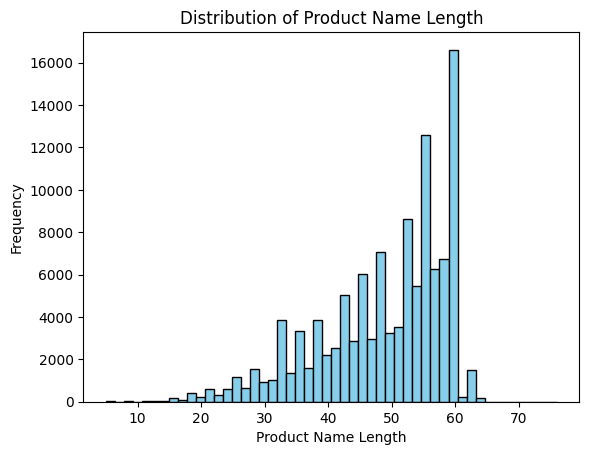

In [179]:
#Check skewness for 'product_name_length'
df_merge['product_name_lenght'].plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Name Length')
plt.xlabel('Product Name Length')
plt.ylabel('Frequency')
plt.show()

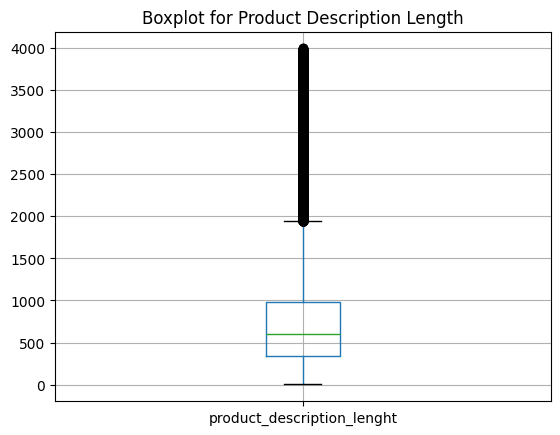

In [180]:
#Check for outliers in 'product_description_length'
df_merge.boxplot(column='product_description_lenght')
plt.title('Boxplot for Product Description Length')
plt.show()

In [181]:
# Fill missing values with the median for product_name_length and product_description_length
df_merge['product_name_lenght'].fillna(df_merge['product_name_lenght'].median(), inplace=True)
df_merge['product_description_lenght'].fillna(df_merge['product_description_lenght'].median(), inplace=True)
df_merge['product_length_cm'].fillna(df_merge['product_length_cm'].mean(), inplace=True)
df_merge['product_height_cm'].fillna(df_merge['product_height_cm'].mean(), inplace=True)
df_merge['product_weight_g'].fillna(df_merge['product_weight_g'].mean(), inplace=True)
df_merge['product_width_cm'].fillna(df_merge['product_width_cm'].mean(), inplace=True)

C:\Users\noure\AppData\Local\Temp\ipykernel_15276\3619813411.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merge['product_description_lenght'].fillna(df_merge['product_description_lenght'].median(), inplace=True)
C:\Users\noure\AppData\Local\Temp\ipykernel_15276\3619813411.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on wh

In [182]:
# Extracting datetime components from 'order_purchase_timestamp'
df_merge['day_of_week_name'] = df_merge['order_purchase_timestamp'].dt.strftime('%A')
df_merge['month_year'] = df_merge['order_purchase_timestamp'].dt.strftime('%Y-%m')
df_merge['day_month_year'] = df_merge['order_purchase_timestamp'].dt.strftime('%Y-%m-%d')
df_merge['day_of_week_int'] = df_merge['order_purchase_timestamp'].dt.weekday + 1
df_merge['hour'] = df_merge['order_purchase_timestamp'].dt.hour
df_merge['month'] = df_merge['order_purchase_timestamp'].dt.month
df_merge['year'] = df_merge['order_purchase_timestamp'].dt.year

# Extracting datetime components from 'order_delivered_customer_date'
df_merge['day_month_year_delivered'] = df_merge['order_delivered_customer_date'].dt.strftime('%Y-%m-%d')

# Calculating delivery time (in days)
df_merge['delivery_time'] = (df_merge['order_delivered_customer_date'] - df_merge['order_purchase_timestamp']).dt.days

# Calculate the time difference (in minutes) between order purchase and approval
df_merge['approval_time'] = (df_merge['order_approved_at'] - df_merge['order_purchase_timestamp']).dt.total_seconds() / 60  # in minutes

# Calculate the time difference (in days) between order purchase and approval
df_merge['approval_time_days'] = (df_merge['order_approved_at'] - df_merge['order_purchase_timestamp']).dt.days 

In [183]:
df_merge['day_month_year'] = pd.to_datetime(df_merge['day_month_year'], errors='coerce')

In [184]:
df_merge['day_month_year_delivered'] = pd.to_datetime(df_merge['day_month_year_delivered'], errors='coerce')

In [185]:
df_merge.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                     0
order_delivered_carrier_date          0
order_delivered_customer_date         0
order_estimated_delivery_date         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
product_category_name              1695
product_name_lenght                   0
product_description_lenght            0
product_photos_qty                 1695
product_weight_g                      0
product_length_cm                     0
product_height_cm                     0
product_width_cm                      0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0


In [186]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 51 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117329 non-null  object        
 1   customer_id                    117329 non-null  object        
 2   order_status                   117329 non-null  object        
 3   order_purchase_timestamp       117329 non-null  datetime64[ns]
 4   order_approved_at              117329 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117329 non-null  datetime64[ns]
 6   order_delivered_customer_date  117329 non-null  datetime64[ns]
 7   order_estimated_delivery_date  117329 non-null  datetime64[ns]
 8   order_item_id                  117329 non-null  int64         
 9   product_id                     117329 non-null  object        
 10  seller_id                      117329 non-null  object        
 11  

In [187]:
# Check if the column exists with exact spelling
print("Columns in df_merged:", df_merged.columns.tolist())


Columns in df_merged: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'review_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value', 'seller_zip_code_prefix', 'seller_city', 'seller_state', 'product_category_name_english']


C:\Users\noure\AppData\Local\Temp\ipykernel_15276\3421650310.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_over_time = df_merged['price'].resample('M').sum()


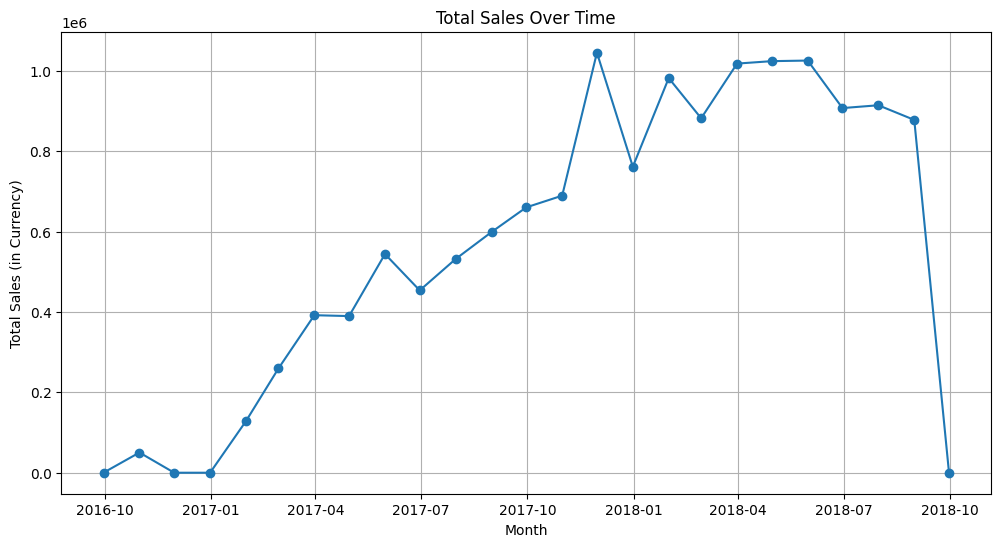

In [188]:
# Ensure 'order_purchase_timestamp' is in datetime format
df_merged['order_purchase_timestamp'] = pd.to_datetime(df_merged['order_purchase_timestamp'])

# Set 'order_purchase_timestamp' as the index
df_merged.set_index('order_purchase_timestamp', inplace=True)

# Resample to get monthly sales
sales_over_time = df_merged['price'].resample('M').sum()

# Plotting the sales over time
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time.index, sales_over_time.values, marker='o')
plt.title('Total Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales (in Currency)')
plt.grid()
plt.show()

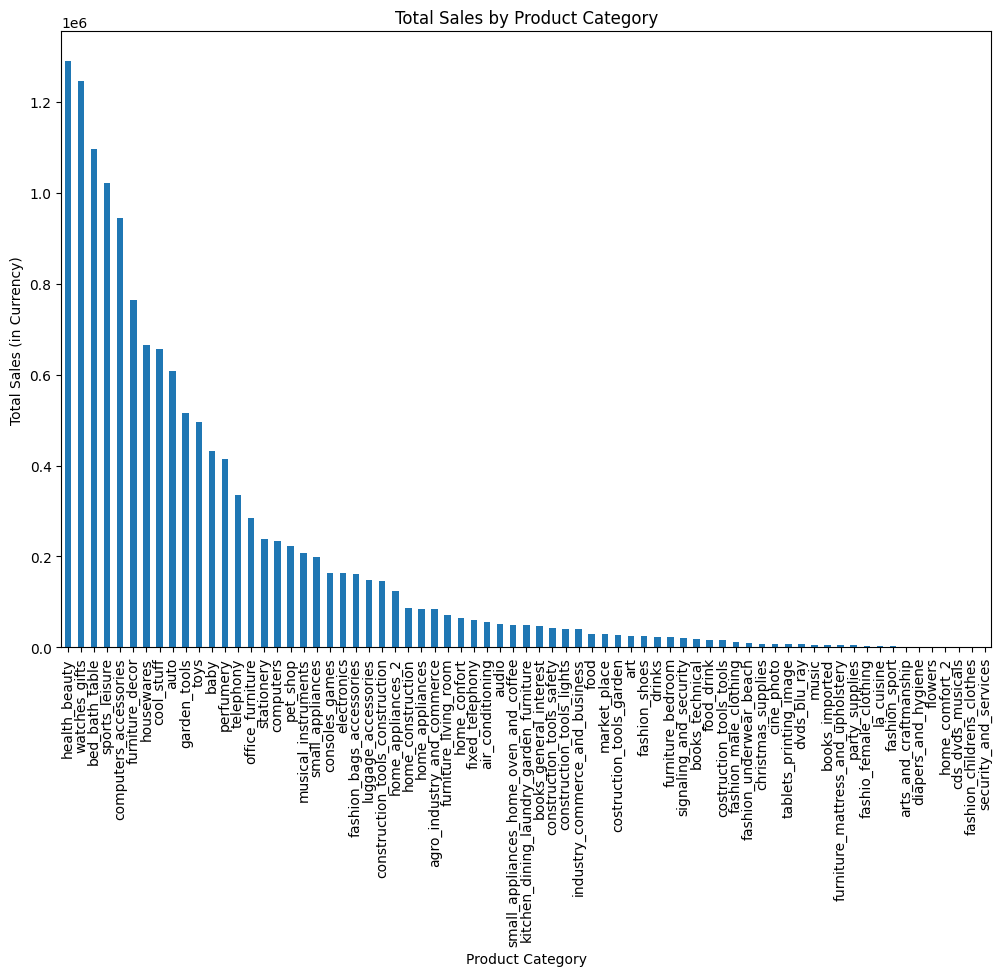

In [189]:
sales_by_category = df_merged.groupby('product_category_name_english')['price'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sales_by_category.plot(kind='bar')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales (in Currency)')
plt.xticks(rotation=90)
plt.show()

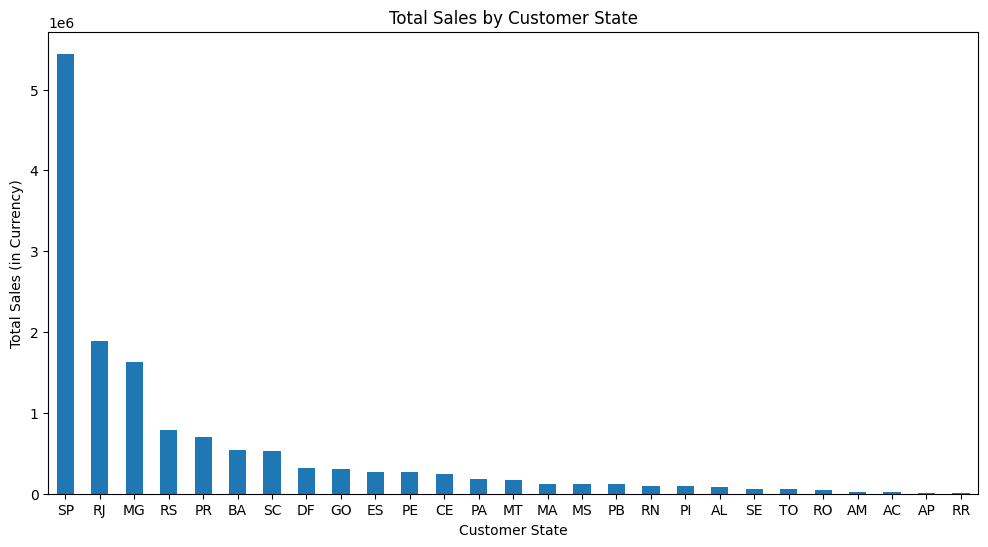

In [190]:
sales_by_state = df_merged.groupby('customer_state')['price'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sales_by_state.plot(kind='bar')
plt.title('Total Sales by Customer State')
plt.xlabel('Customer State')
plt.ylabel('Total Sales (in Currency)')
plt.xticks(rotation=0)
plt.show()

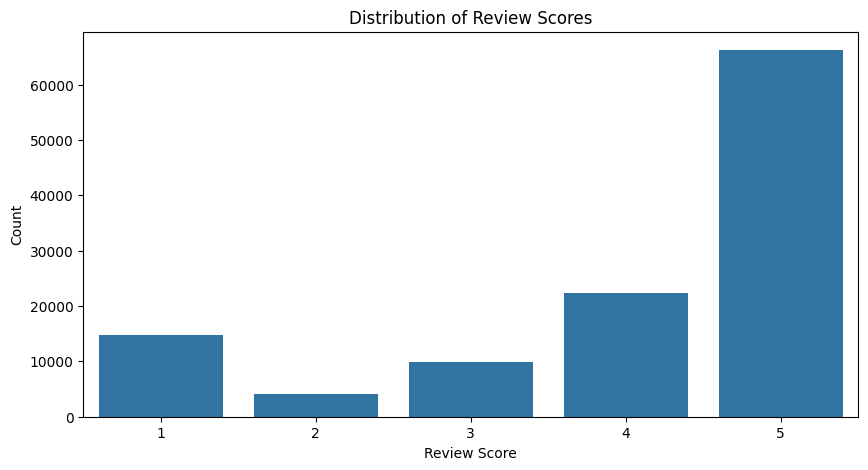

In [191]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_merge, x='review_score')
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()

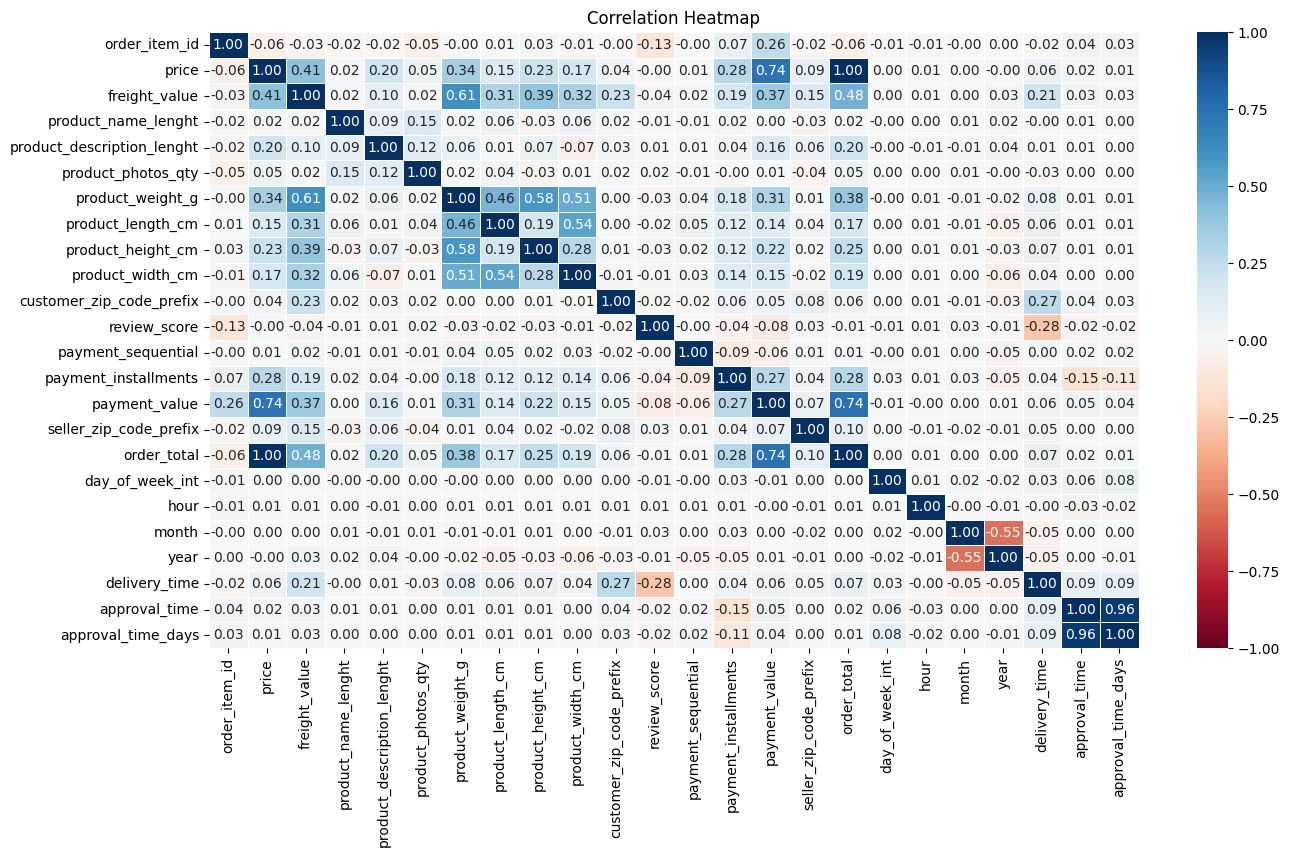

In [192]:
corr = df_merge.corr(numeric_only=True)

plt.figure(figsize=(15, 8))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap='RdBu', annot=True, fmt='.2f', center=0, linewidths=.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

The Barchart represent the growth in sales from 2017 to 2018, which The total sales amount in 2017 was 1,717,479.55 USD, while in 2018, it reached 2,055,094.13 USD. 


In [193]:
# Convert 'order_purchase_timestamp' to datetime if not done already
df_merge['order_purchase_timestamp'] = pd.to_datetime(df_merge['order_purchase_timestamp'])

# Extract year and month from 'order_purchase_timestamp'
df_merge['year'] = df_merge['order_purchase_timestamp'].dt.year
df_merge['month'] = df_merge['order_purchase_timestamp'].dt.month

# Group by year and month, then calculate the total sales (sum of 'price' column)
monthly_sales = df_merge.groupby(['year', 'month'])['price'].sum().reset_index()

# Filter out 2016 if needed
monthly_sales = monthly_sales[monthly_sales['year'] > 2016]

# Preview the result
print(monthly_sales.head())


   year  month      price
3  2017      1  128589.06
4  2017      2  259477.98
5  2017      3  392081.04
6  2017      4  389909.32
7  2017      5  544303.13


In [194]:
# Calculate total sales for 2017 and 2018
total_sales_by_year = df_merge[df_merge['year'].isin([2017, 2018])].groupby('year')['price'].sum().reset_index()

# Convert to USD (assuming 1 BRL ≈ 0.45 USD)
total_sales_by_year['total_sales_usd'] = total_sales_by_year['price'] * 0.45

# Rename columns for clarity
total_sales_by_year.columns = ['Year', 'Total Sales (BRL)', 'Total Sales (USD)']

# Display the total sales by year dataframe
print(total_sales_by_year)


   Year  Total Sales (BRL)  Total Sales (USD)
0  2017         6456486.71       2.905419e+06
1  2018         7634098.85       3.435344e+06


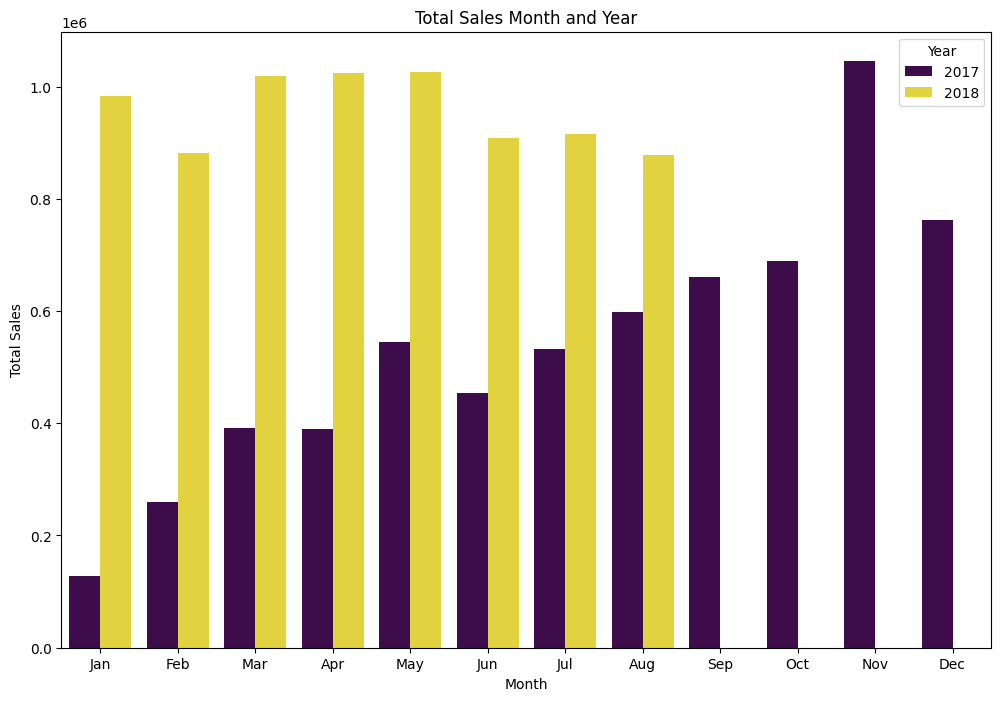

In [195]:
# Extract year and month
df_merge['year'] = df_merge['order_purchase_timestamp'].dt.year
df_merge['month'] = df_merge['order_purchase_timestamp'].dt.month

# Filter out data from 2016
df_filtered = df_merge[df_merge['year'] != 2016]

# Group the data by year and month, summing up sales (price)
sales_by_month_year = df_filtered.groupby(['year', 'month'])['price'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 8))

# Using seaborn's barplot to show sales by month and year with different colors for each year
sns.barplot(x='month', y='price', hue='year', data=sales_by_month_year, palette='viridis')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales Month and Year')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend(title='Year')
plt.show()

In [196]:
# Ensure the 'day_month_year' column is a datetime.date type
df_grouped['day_month_year'] = pd.to_datetime(df_grouped['day_month_year']).dt.date

# Set the start and end dates as datetime.date objects
start_date = pd.to_datetime('2017-06-01').date()
end_date = pd.to_datetime('2018-06-30').date()

# Filter the data using .date() for comparison
filtered_df = df_grouped[(df_grouped['day_month_year'] >= start_date) & 
                         (df_grouped['day_month_year'] <= end_date)]

# Display the filtered data
print(filtered_df.head())


    day_month_year  total_orders  avg_delivery_time
159     2017-06-01           146          10.424658
160     2017-06-02           148          11.614865
161     2017-06-03           102          14.401961
162     2017-06-04           111          11.171171
163     2017-06-05           178          10.797753


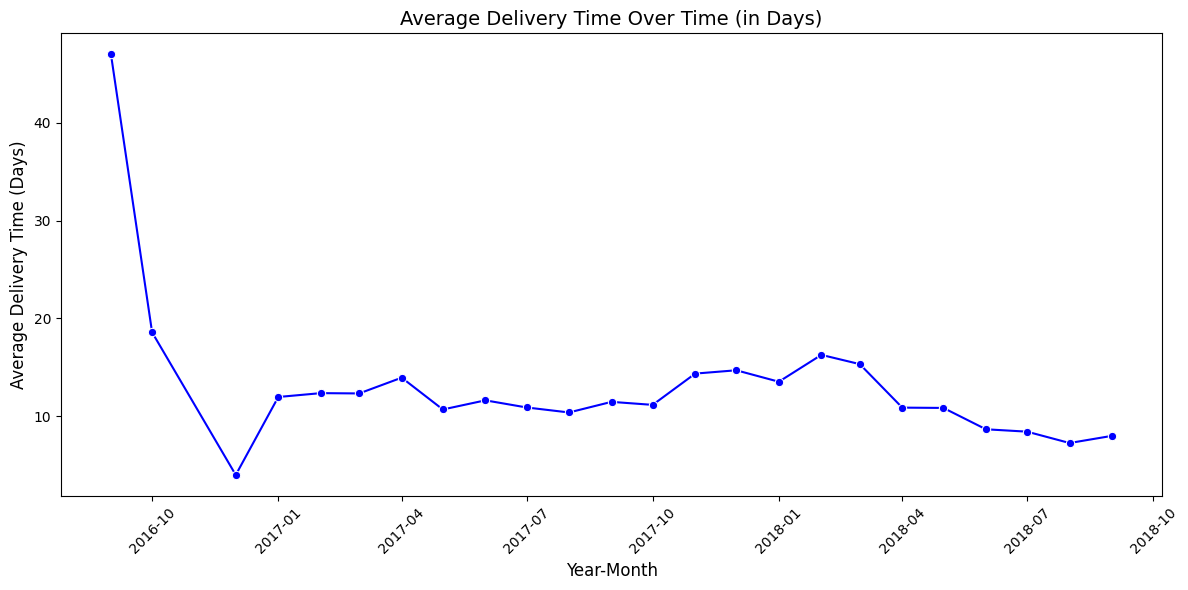

In [197]:
# Set the plot size
plt.figure(figsize=(12, 6))

# Plotting the average delivery time over time
sns.lineplot(x='year_month', y='delivery_time', data=avg_delivery_time, marker='o', color='b')

# Set the labels and title
plt.title('Average Delivery Time Over Time (in Days)', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Average Delivery Time (Days)', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

97% of the products have been delivered, with an average delivery time of approximately 10 to 13 days.  Despite this increase in delivery time, the number of products receiving a review score of 5 remained high. This can be attributed to the increase in sales during the same period, as indicated in the graphs above, which show a rise from 6.8% to 7.3% in sales